In [1]:
import os
import sys

In [2]:
from maquinas.contextfree.cfg import ContextFreeGrammar as CFG
from maquinas.regular.rg import RegularGrammar as RG

In [3]:
gato=CFG('S->V; V-> vN; V -> vNP; N -> a; N -> N P ; P -> c')
print(gato.summary())

No terminal : V, S, P, N
Terminals   : a, c, v
Start       : S
Productions :
 S → V
 V → vN | vNP
 N → a | NP
 P → c


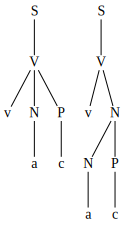

In [4]:
roots,chart,forest=gato.parse('vac')
gato.graph_trees(gato.extract_trees(forest))

In [5]:
re=CFG('E-> T; E -> E "+" T; T -> F; T -> TF ; F -> B; F -> F* ; F -> "(" E ")"; B-> a; B -> b; B -> "ϵ"; B -> "∅"')
print(re.summary())

No terminal : E, T, B, F
Terminals   : +, ϵ, (, *, ), ∅, b, a
Start       : E
Productions :
 E → T | E+T
 T → F | TF
 F → B | F* | (E)
 B → a | b | ϵ | ∅


In [6]:
roots,chart,forest=re.parse('(a*ba*ba*)*')
trees=list(re.extract_trees(forest))
for i,step in enumerate(re.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

E ⇒  T
  ⇒  F
  ⇒  F*
  ⇒  (E)*
  ⇒  (E)*
  ⇒  (T)*
  ⇒  (TF)*
  ⇒  (TFF)*
  ⇒  (TFFF)*
  ⇒  (TFFFF)*
  ⇒  (FFFFF)*
  ⇒  (F*FFFF)*
  ⇒  (B*FFFF)*
  ⇒  (a*FFFF)*
  ⇒  (a*FFFF)*
  ⇒  (a*FFFF)*
  ⇒  (a*BFFF)*
  ⇒  (a*bFFF)*
  ⇒  (a*bFFF)*
  ⇒  (a*bF*FF)*
  ⇒  (a*bB*FF)*
  ⇒  (a*ba*FF)*
  ⇒  (a*ba*FF)*
  ⇒  (a*ba*FF)*
  ⇒  (a*ba*BF)*
  ⇒  (a*ba*bF)*
  ⇒  (a*ba*bF)*
  ⇒  (a*ba*bF*)*
  ⇒  (a*ba*bB*)*
  ⇒  (a*ba*ba*)*
  ⇒  (a*ba*ba*)*
  ⇒  (a*ba*ba*)*
  ⇒  (a*ba*ba*)*
  ⇒  (a*ba*ba*)*
 

In [7]:
re.save_trees_img(trees,filename='arboles_re')

In [8]:
ambigua=CFG('S -> X; S -> R; X-> YZ; Y -> aYb; Y-> epsilon;  Z -> cZd; Z -> epsilon; R -> aRd; R -> T; T ->bTc ; T -> epsilon')
print(ambigua.summary())

No terminal : R, X, Z, T, Y, S
Terminals   : a, d, c, b
Start       : S
Productions :
 S → X | R
 X → YZ
 Y → aYb | ε
 Z → cZd | ε
 R → aRd | T
 T → bTc | ε


In [9]:
roots,chart,forest=ambigua.parse('aabbcd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

S ⇒  X
  ⇒  YZ
  ⇒  aYbZ
  ⇒  aYbZ
  ⇒  aaYbbZ
  ⇒  aaYbbZ
  ⇒  aaεbbZ
  ⇒  aaεbbZ
  ⇒  aaεbbZ
  ⇒  aaεbbZ
  ⇒  aaεbbcZd
  ⇒  aaεbbcZd
  ⇒  aaεbbcεd
  ⇒  aaεbbcεd
  ⇒  aaεbbcεd
 

In [10]:
ambigua.save_trees_img(trees,filename='aabbcd')

In [11]:
roots,chart,forest=ambigua.parse('aabcdd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

S ⇒  R
  ⇒  aRd
  ⇒  aRd
  ⇒  aaRdd
  ⇒  aaRdd
  ⇒  aaTdd
  ⇒  aabTcdd
  ⇒  aabTcdd
  ⇒  aabεcdd
  ⇒  aabεcdd
  ⇒  aabεcdd
  ⇒  aabεcdd
  ⇒  aabεcdd
 

In [12]:
ambigua.save_trees_img(trees,filename='aabcdd')

In [13]:
roots,chart,forest=ambigua.parse('aabbccdd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

S ⇒  R
  ⇒  aRd
  ⇒  aRd
  ⇒  aaRdd
  ⇒  aaRdd
  ⇒  aaTdd
  ⇒  aabTcdd
  ⇒  aabTcdd
  ⇒  aabbTccdd
  ⇒  aabbTccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
 

In [14]:
ambigua.save_trees_img(trees,filename='aabbccdd')

In [15]:
regular=CFG('A-> aA; A->bB; B -> aB; B->bA; A->a; B->b')
print(regular.summary())

No terminal : A, B
Terminals   : a, b
Start       : A
Productions :
 A → aA | bB | a
 B → aB | bA | b


In [16]:
roots,chart,forest=regular.parse('aabbabaaaaba')
trees=list(regular.extract_trees(forest))
for i,step in enumerate(regular.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

A ⇒  aA
  ⇒  aA
  ⇒  aaA
  ⇒  aaA
  ⇒  aabB
  ⇒  aabB
  ⇒  aabbA
  ⇒  aabbA
  ⇒  aabbaA
  ⇒  aabbaA
  ⇒  aabbabB
  ⇒  aabbabB
  ⇒  aabbabaB
  ⇒  aabbabaB
  ⇒  aabbabaaB
  ⇒  aabbabaaB
  ⇒  aabbabaaaB
  ⇒  aabbabaaaB
  ⇒  aabbabaaaaB
  ⇒  aabbabaaaaB
  ⇒  aabbabaaaabA
  ⇒  aabbabaaaabA
  ⇒  aabbabaaaaba
  ⇒  aabbabaaaaba
 

In [17]:
regular.save_trees_img(trees,filename='gr')

In [18]:
from maquinas.contextfree.pda import PushDownAutomaton as PDA
from maquinas.simulation import Simulation

In [19]:
# Ejercicio uno
anbn=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b'],
         gamma=['A'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0')]),
            (('q_0','a','A'),[('q_0','AA')]),
            (('q_0','b','A'),[('q_1','epsilon')]),
            (('q_1','b','A'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')])
         ]
    )

In [21]:
for q,a,w_ in anbn.delta_stepwise("aaabbb"):
    if a:
        print(f"{a} -> {anbn.states2string(q)}", end=",\n ")
    else:
        print(f"{anbn.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {anbn.states2string(res)} Se acepta?", "Sí" if anbn.acceptor(res) else "No" )

q_0, Z₀]
 a -> q_0, A Z₀],
 a -> q_0, A A Z₀],
 a -> q_0, A A A Z₀],
 b -> q_1, A A Z₀],
 b -> q_1, A Z₀],
 b -> q_1, Z₀] | q_2, Z₀],
 
Con q_1, Z₀] | q_2, Z₀] Se acepta? Sí


In [22]:
anbn.save_img('anbn')

In [23]:
anbn.save_gif("aaabbb",'anbn.gif')